In [1]:
import cymetric as cym
import glob
from cymetric import graphs
import pandas


/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.data is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.material is not yet QA compliant.
  return f(*args, **kwds)
/opt/local/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: QAWarning: pyne.enrichment is not yet QA compliant.
  return f(*args, **kwds)


In [2]:
import sys
import argparse
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
plt.rc('xtick', labelsize=1)
plt.rc('ytick', labelsize=1)
plt.rcParams.update({'font.size': 5})
import matplotlib.cm as cm
import matplotlib.patches as patches
from matplotlib import colors, ticker
import random

from pyDOE import lhs
import numpy as np
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
%matplotlib inline

In [3]:
from cymetric import timeseries as tm

In [4]:
nuc_list_in = ["238pu", "239pu", "240pu", "241pu", "242pu", "241am"]

def get_ev(file):
    db = cym.dbopen(file)
    ev = cym.Evaluator(db)
    return ev

def get_nuc_frac(ev, nuc):
    df = tm.transactions(ev, receivers=['lwr'], nucs=[nuc] )
    df = df[df['Mass'] > 0 ]

    tot = tm.transactions(ev, receivers=['lwr'], nucs=nuc_list_in) 
    tot = tot[tot['Mass'] > 0 ]                

    df['Mass'] = df['Mass']/tot['Mass']
    return df.iloc[2]['Mass']

def get_pu_frac_eoc(ev):
    df = tm.transactions(ev, receivers=['lwr'], nucs=nuc_list_in )
    df = df[df['Mass'] > 0 ]

    tot = tm.transactions(ev, receivers=['lwr']) 
    tot = tot[tot['Mass'] > 0 ]                

    df['Mass'] = df['Mass']/tot['Mass']
    return df.iloc[2]['Mass']

    
    

def eoc_pu_compo(ev):
    compo = []
    for nuc in nuc_list_in:
        compo.append(get_nuc_frac(ev, nuc))
    return compo

def get_eoc_intel(ev):
    tt_ = eoc_pu_compo(ev) +  [get_pu_frac_eoc(ev)]
    return tt_

In [5]:
ev_0 = get_ev("2_fix.h5")

In [6]:
get_pu_frac_eoc(ev_0)

0.07806999999999999

In [12]:
def plot(df, filename,name_matrix):
    g = sns.PairGrid(df)
    g.map_diag(sns.kdeplot)
    cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
    g.map_upper(sns.kdeplot, cmap=cmap, n_levels=60, shade=True);
    g.savefig(filename)


In [13]:
data =[]
for file in glob.glob("*_fix.h5"):
    print(file)
    ev = get_ev(file)
    data.append(get_eoc_intel(ev))

21_fix.h5
17_fix.h5
2_fix.h5
0_fix.h5
19_fix.h5
15_fix.h5
8_fix.h5
4_fix.h5
11_fix.h5
13_fix.h5
6_fix.h5
3_fix.h5
16_fix.h5
20_fix.h5
18_fix.h5
14_fix.h5
1_fix.h5
10_fix.h5
9_fix.h5
5_fix.h5
7_fix.h5
12_fix.h5


In [14]:
print(data)

df = pandas.DataFrame(data)

[[0.011754340124491003, 0.6798280124677467, 0.16736452554099632, 0.08754133331006267, 0.0228183757545651, 0.03069341280213822, 0.07806999999999997], [0.02348542762831694, 0.5781093612815588, 0.16877988538441546, 0.1567416517969732, 0.06754945772260407, 0.005334216186131449, 0.07807], [0.008083067292210524, 0.5398940158324537, 0.2573344075129666, 0.1226428460205873, 0.027506598613138207, 0.04453906472864368, 0.07807], [0.005725729708254792, 0.521715243087265, 0.2928165937145774, 0.13113773194957734, 0.01369527696616471, 0.03490942457416069, 0.07806999999999999], [0.017474733611983814, 0.49147891610271777, 0.15709412727723046, 0.13652657298597287, 0.1910071942060994, 0.006418455815995602, 0.07807], [0.02358564645574505, 0.6990597860671205, 0.1334809211463745, 0.007322913949941209, 0.13030601576311385, 0.006244716617705153, 0.07806999999999996], [0.06774417165710331, 0.4365460898286755, 0.23768584175155216, 0.04384401063981788, 0.17723522665236519, 0.03694465947048592, 0.07807], [0.066662

In [15]:
name = nuc_list_in + ['Frac']
df.columns = name
df

,238pu,239pu,240pu,241pu,242pu,241am,Frac
0,0.011754,0.679828,0.167365,0.087541,0.022818,0.030693,0.07807
1,0.023485,0.578109,0.168780,0.156742,0.067549,0.005334,0.07807
2,0.008083,0.539894,0.257334,0.122643,0.027507,0.044539,0.07807
3,0.005726,0.521715,0.292817,0.131138,0.013695,0.034909,0.07807
4,0.017475,0.491479,0.157094,0.136527,0.191007,0.006418,0.07807
5,0.023586,0.699060,0.133481,0.007323,0.130306,0.006245,0.07807
6,0.067744,0.436546,0.237686,0.043844,0.177235,0.036945,0.07807
7,0.066663,0.458743,0.220101,0.036158,0.166476,0.051858,0.07807
8,0.051200,0.519628,0.184343,0.032980,0.193843,0.018005,0.07807
9,0.053443,0.465197,0.196422,0.188272,0.066504,0.030161,0.07807


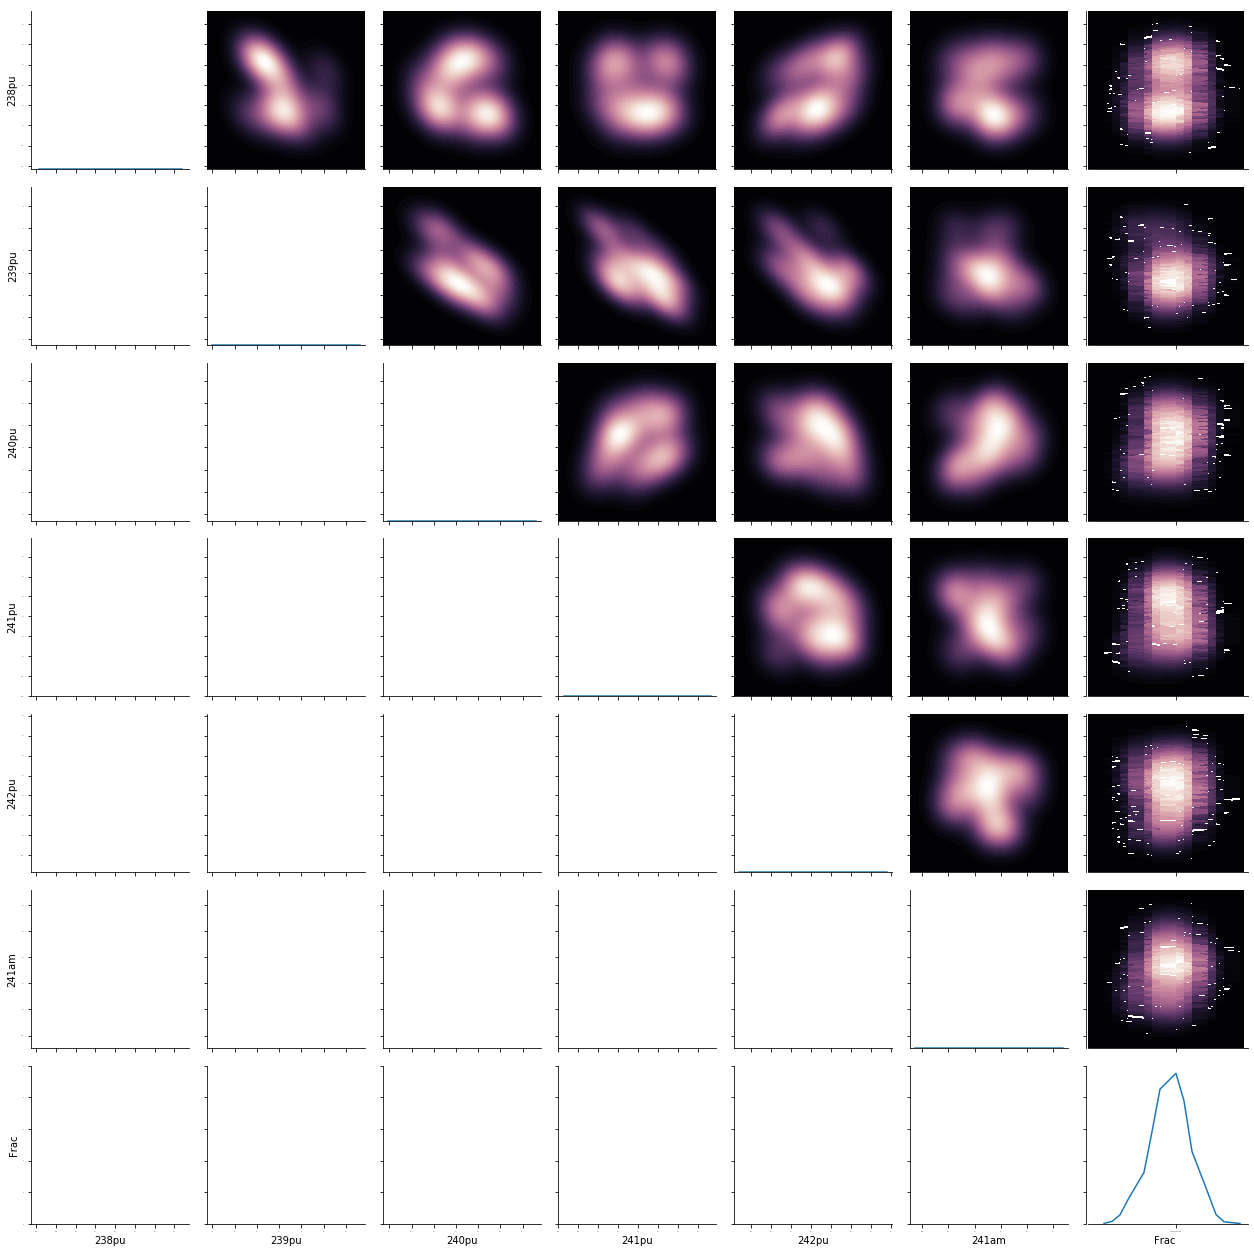

In [16]:
plot(df, "test.png", nuc_list_in)